In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm 

In [6]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [7]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [9]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [10]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [11]:
df.drop(168, axis=0, inplace=True)

In [12]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.set_index('Month', inplace = True)

In [15]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


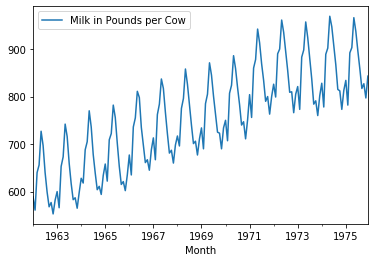

In [17]:
df.plot()

In [19]:
time_series = df['Milk in Pounds per Cow']

In [20]:
type(time_series)

pandas.core.series.Series

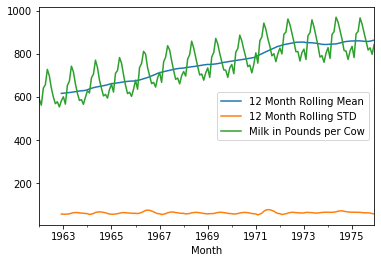

In [23]:
time_series.rolling(12).mean().plot(label = '12 Month Rolling Mean')
time_series.rolling(12).std().plot(label = '12 Month Rolling STD')
time_series.plot()
plt.legend()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
decomp = seasonal_decompose(time_series)

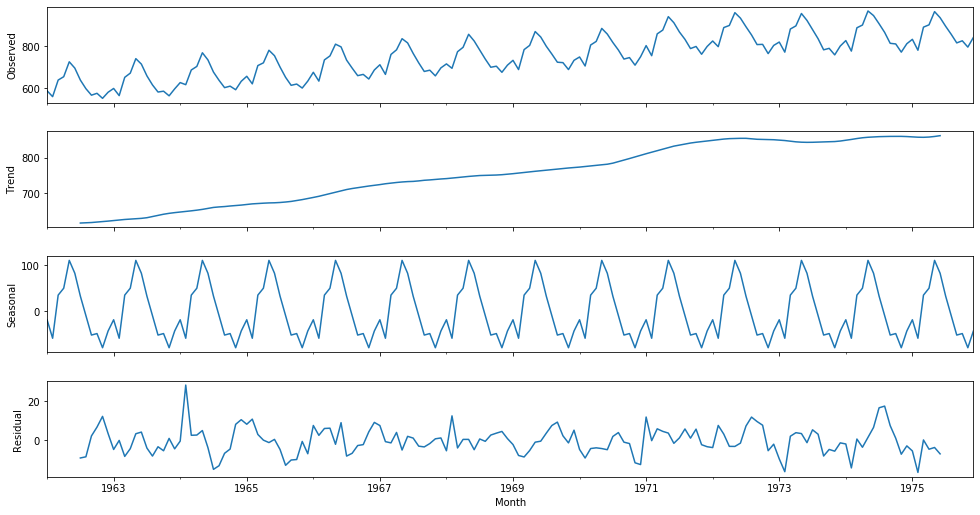

In [30]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [31]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result = adfuller(df['Milk in Pounds per Cow'])

In [36]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic','p-value','# of lags','# of Observations used']
    for value, label in zip(result, labels):
        print (label +' : '+ str(value))
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')
    

In [37]:
adf_check(time_series)

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.303811587422133
p-value : 0.6274267086030301
# of lags : 13
# of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [38]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1) 

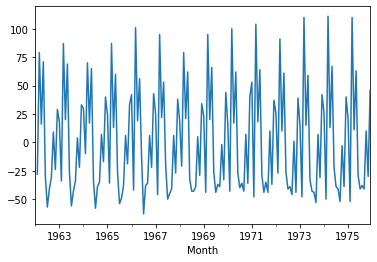

In [39]:
df['First Difference'].plot()

In [42]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.054995558653075
p-value : 0.030068004001785248
# of lags : 14
# of Observations used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [43]:
df['Second Difference'] = df['First Difference'] -  df['First Difference'].shift(1) 

In [44]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603434
p-value : 1.1126989332079236e-26
# of lags : 11
# of Observations used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [45]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12) 

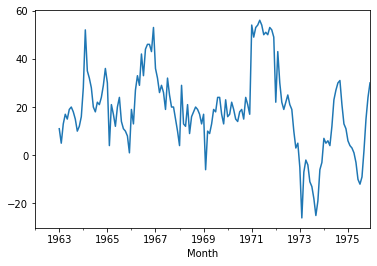

In [46]:
df['Seasonal Difference'].plot()

In [47]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.3354193143593975
p-value : 0.16079880527711365
# of lags : 12
# of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [48]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

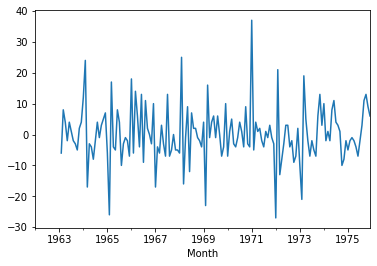

In [49]:
df['Seasonal First Difference'].plot()

In [ ]:
adf_check(df['Seasonal Differencesonal'])